# Introduction

This notebook includes a step-by-step explanation and code review of how to perform the statistical survival analysis used to investigate the time required for time-to-failure events to occur.

Part 1:
* *Basics of survival analysis.*

* *Kaplan-Meier fitter theory with an example.*

* *Nelson-Aalen fitter theory with an example.*

<font color='red'>
Content:
    
1. [Survival Analysis Basics](#1)
    * [How it can be useful to analyze ongoing COVID-19 pandemic data?](#2)
    * [In what areas can survival analysis be used?](#3)
    * [Objectives](#4)
    * [Fundamental Concepts](#5)
    * [Censoring](#6)
    * [Survival and Hazard Functions](#7)
2. [Example 1: Kaplan-Meier Estimetor](#8)
    * [Survival Function](#9)
    * [Import Required Libraries](#11)
    * [Read the Dataset](#12)
    * [Columns of Our Dataset](#13)
    * [Additional Info About Dataset](#14)
    * [Statistical Info About Dataset](#15)
    * [Create an Object for KaplanMeierFitter](#16)
    * [Organize the Data](#17)
    * [Fitting our Data Into Object](#18)
    * [Event Table](#19)
    * [Calculating the Probability of Survival for Individual Timelines](#20)
    * [Survival After Probability](#21)
    * [Predict Function](#22)
    * [Finding Survival Probability for an Array of Time](#23)
    * [Get Survival Probability for the Whole Timeline](#24)
    * [Median](#25)
    * [Plot the Graph](#26)
    * [Confidence Interval](#27)
    * [Probability of a Person to Die](#28)
    * [Plot the Graph for Cumulative Density](#29)
3. [Example 2: Estimating Hazard Rates Using Nelson-Aalen](#30)
    * [Hazard Function](#31)
    * [Import Library - Fitting the Data](#32)
    * [Cumulative Hazard](#33)
    * [Plot the Data](#34)
    * [Predict a Value](#35)

<a id="1"></a> <br>
# Survival Analysis Basics

Survival analysis is a set of games used to find the time it takes for an interesting event to occur and to examine the time it takes for some important event (known as death) to occur. Time can be measured in years, months, weeks or days. The subject of interest can be something of interest. It could be a real death, birth or retirement.

<a id="2"></a> <br>
### How it can be useful to analyze ongoing COVID-19 pandemic data?

We can find;
* the number of days until patients showed COVID-19 symptoms.
* for which age group it's deadlier.
* which threatment has the highest survival probability.
* whetever a person's sex has a significant effect on their survival time.
* the median number of days of survival for patients.

<a id="3"></a> <br>
### In what areas can survival analysis be used? 

Survival analysis is used in a variety of field such as:

* Cancer studies for patients survival time analyses.
* Sociology for “event-history analysis”.
* In Engineering for “failure-time analysis”.
* Time until product failure.
* Time until a warranty claim.
* Time until a process reaches a critical level.
* Time from initial sales contact to a sale.
* Time from employee hire to either termination or quit.
* Time from a salesperson hire to their first sale.

In cancer studies, typical research questions include:

1. What is the impact of certain clinical characteristics on patient’s survival? For example, is there any difference between the group of people who has higher blood sugar and those who don’t?

2. What is the probability that an individual survives a specific period (years, months, days)? For example, given a set of cancer patients, we will be able to tell that if 300(random number) days after the diagnosis of cancer has been passed, then the probability of that person being alive at that time will be 0.7 (random number).

3. Are there differences in survival between groups of patients? For example, let’s say there are 2 groups of people diagnosed with cancer. Those 2 groups were given 2 different kinds of treatments. Now our goal here will be to find out if there is a significant difference between the survival time for those 2 different groups based on the treatment they were given.

<a id="4"></a> <br>
### Objectives 

In cancer studies, most of the survival analyses use the following methods.

1. Kaplan-Meier plots to visualize survival curves.

2. Nelson-Aalen plots to visualize the cumulative hazard.

3. Log-rank test to compare the survival curves of two or more groups

4. Cox proportional hazards regression to find out the effect of different variables like age, sex, weight on survival.

<a id="5"></a> <br>
### Fundamental Concepts

Here, we start by defining fundamental terms of survival analysis, including:

* Survival time and event.
* Censoring of data.
* Survival function and hazard function.
* Survival time and type of events in cancer studies

**Survival Time:** Referred to an amount of time until when a subject is alive or actively participates in a survey.

There are mainly three types of events, including:

**1. Relapse:** A deterioration in someone’s state of health after a temporary improvement.

**2. Progression:** The process of developing or moving gradually towards a more advanced state. ( Improvement in health.)

**3. Death:** The destruction or permanent end of something.

<a id="6"></a> <br>
### Censoring

As mentioned above, survival analysis focuses on the occurrence of an event of interest (e.g., birth, death, retirement). But there is still a possibility that the event may not be observed for various reasons. Such observations are known as censored observations.

Censoring may arise in the following ways:

* A patient has not yet experienced the event of interest (death or relapse in our case) within the study period.
* A patient is not followed anymore.
* If a patient moves to another city, then follow-up might not be possible for the hospital staff.

There are three general types of censoring, right-censoring, left-censoring, and interval-censoring.

**Right Censoring:** The death of the person.

**Left Censoring:** The event can’t be observed for some reason. It includes events that occurred before the experiment started. (e.g., number of days from birth when the kid started walking.)

**Interval Censoring:** When we have data for some intervals only.

<a id="7"></a> <br>
### Survival and Hazard Function

We generally use two related probabilities to analyse survival data.

**1. The Survival Probability**

To find survival probability, we’ll be using survivor function S(t), which is the Kaplan-Meier Estimator. Survival probability is the probability that an individual (e.g., patient) survives from the time origin (e.g., diagnosis of cancer) to a specified future time t. For example, S(200) = 0.7 means that after 200 days has passed since the diagnosis of cancer, the patient’s survival probability has dropped to 0.7. If the person stays alive at the end of an experiment, then that data will be censored.

**2. The Hazard Probability**

The hazard probability, denoted by h(t), is the probability that an individual(e.g., patient) who is under observation at a time t has an event(e.g., death) at that time. For example, If h(200) = 0.7, then it means that the probability of that person being dead at time t=200 days is 0.7.


Note that, in contrast to the survivor function, which focuses on not having an event, the hazard function focuses on the event occurring. I think we can clearly see that higher survival probability and lower hazard probability is good for the patient.

<a id="8"></a> <br>
# Example 1: Kaplan-Meier Estimator

The Kaplan–Meier estimator is a non-parametric statistic used to estimate the survival function (probability of a person surviving) from lifetime data. In medical research, it is often used to measure the fraction of patients living for a certain amount of time after treatment. For example, Calculating the amount of time(year, month, day) certain patient lived after he/she was diagnosed with cancer or his treatment starts. The estimator is named after Edward L. Kaplan and Paul Meier, whom each submitted similar manuscripts to the Journal of the American Statistical Association.

The formula for Kaplan-Meier is as follows:

The probability at time ti, S(ti), is calculated as;

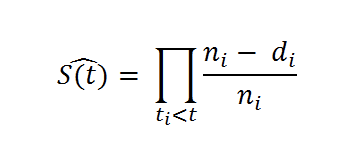

We can also write it as;

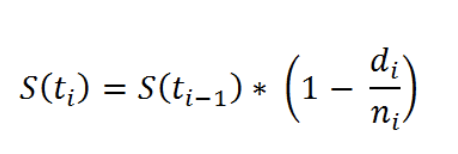


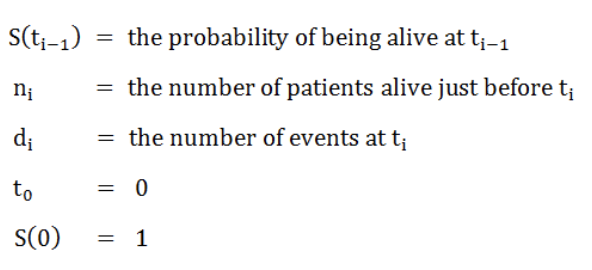

<a id="9"></a> <br>
### Survival Function

For Example;

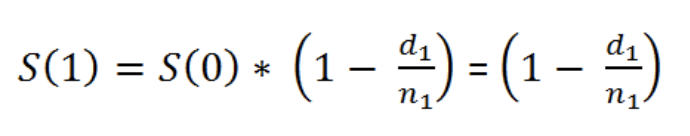

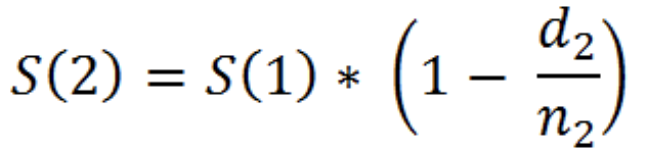

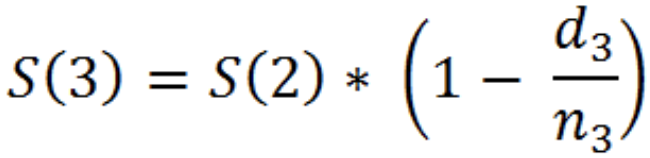

In a more generalized way, we can say that;

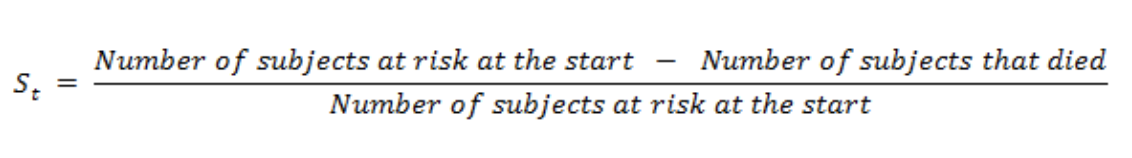

For example we can say that;

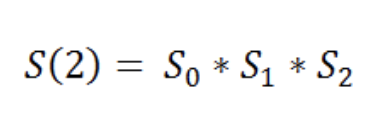

Now, let's apply the theory we discussed in the Kaplan-Meier Estimator.

<a id="11"></a> <br>
### Import required libraries:

In [ ]:
!pip install lifelines

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from lifelines import KaplanMeierFitter 

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

<a id="12"></a> <br>
### Read the dataset:

In [ ]:
data=pd.read_csv("../input/covid19-survival-dataset/SurvivalCovid.csv")
data.head()

<a id="13"></a> <br>
### Columns of our dataset:

In [ ]:
data.columns

<a id="14"></a> <br>
### Additional info about dataset:

It gives us information about the data types and the number of rows in each column that has null values. It’s very important for us to remove the rows with a null value for some of the methods in survival analysis.

In [ ]:
data.info()

**inst:** Instution code

**time:** Survival time in days

**status:** Censoring status -> 1=Censored 2=Dead

**age:** Age in years

**sex:** Male=1 Female=2

**ph.ecog:** Ecog performance score -> 0=Good 5=Dead

**ph.karno:** Karnofsky performance score as rated by pysician -> Bad=0 Good=100 

**pat.karno:** Karnofsky performance score as rated by patients

**meal.cal:** Calories consumed at meals

**wt.loss:** Weight loss in last six months

<a id="15"></a> <br>
### Statistical info about dataset:

It gives us some statistical information like the total number of rows, mean, standard deviation, minimum value, 25th percentile, 50th percentile, 75th percentile, and maximum value for each column in our dataset.

In [ ]:
data.describe()

<a id="15"></a> <br>
### Find out sex distribution using histogram:

This gives us a general idea about how our data is distributed. In the following graph, you can see that around 139 values have a status of 1, and around 90 values have a status of 2. It means that in our dataset, there are 139 males and around 90 females.

In [ ]:
data["sex"].hist()

<a id="16"></a> <br>
### Create an object for KaplanMeierFitter:

In [ ]:
kmf=KaplanMeierFitter()

<a id="17"></a> <br>
### Organize the data:

Now we need to organize our data. We’ll add a new column in our dataset that is called “dead”. It stores the data about whether a person that is a part of our experiment is dead or alive (based on the status value). If our status value is 1 then that person is alive, and if our status value is 2 then the person is dead. It’s a very crucial step for what we need to do in the next step. As we are going to store our data in columns called censored and observed. Where observed data stores the value of dead persons in a specific timeline and censored data stores the value of alive persons or persons that we’re not going to investigate at that timeline.

In [ ]:
#if status=1 -> dead=0
#if status=2 -> dead=1

data.loc[data.status==1, 'dead']=0
data.loc[data.status==2, 'dead']=1

data.head()

<a id="18"></a> <br>
### Fitting our data into object:

Here our goal is to find the number of days a patient survived before they died. So our event of interest will be “death”, which is stored in the “dead” column. The first argument it takes is the timeline for our experiment.

In [ ]:
#The 1st arg accepts an array or pd.Series of individual survival times.
#The 2nd arg accepts an array or pd.Series that indicate if the event interest (or death) occured.

kmf.fit(durations=data['time'], event_observed=data['dead'])

<a id="19"></a> <br>
### Event table:

One most important method of kmf object is “event_table”. It gives us various information for our data fitted. Let’s have a look at it column-by-column.

**1. Event_at:** It stores the value of the timeline for our dataset, i.e., when was the patient observed in our experiment or when was the experiment conducted. It can be the number of minutes, days, months, years etc. In our case, it’s going to be the number of days. It basically stores the value of survival days for a patient.

**2. At_risk:** It stores the number of current patients. At the start, it will be the total number of patients we are going to observe in our experiment. If at a certain time, new patients are added, then we have to increase it’s value accordingly. Basically, we can say that:

> **at_risk = current patients at_risk + entrance — removed**

**3. Entrance:** It stores the value of new patients in a given timeline. It’ possible that while we have other patients, some new patients are also diagnosed with cancer. That’s why we add it here.

**4. Censored:** Our ultimate goal is to find the survival probability for a patient. If at a specific timeline person under experiment is alive, then that person goes into the censored category. If we don’t have information about when a patient died, then we add it to the censored data. Other possibilities are if a patient chooses to shift to another town where the experiment can’t be conducted, then we add that patient into the censored category.

**5. Observed:** The number of patients that died during the experiment.

**6. Removed:** It stores the values of patients that are no longer part of our experiment. If a person died or is censored, then they fall into this category. In short,

> **Removed=Observed+Censored**

In [ ]:
#Removed=Observed+Censored
#Censored=Person that didn't die.(They are of no use to us!)
#Observed=Persons that died.

kmf.event_table

<a id="20"></a> <br>
### Calculating the probability of survival for individual timelines:

Here we are going to use the following formula tocount it by hand:

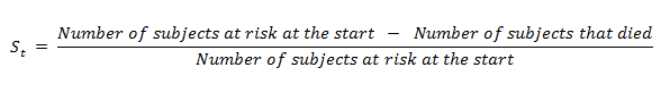

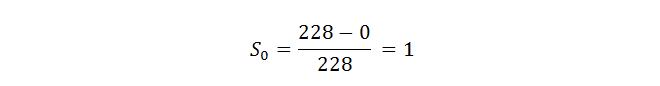

In [ ]:
#calculating survival probability by hand:
event_at_0=kmf.event_table.iloc[0,:]

#calculating the survival probability for t=0:
surv_for_0=(event_at_0.at_risk-event_at_0.observed)/event_at_0.at_risk
surv_for_0

For event_at=5;

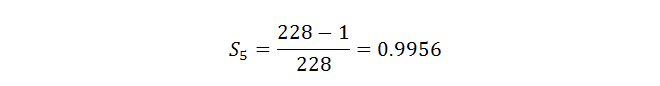

In [ ]:
#calculating survival probability by hand:
event_at_5=kmf.event_table.iloc[1,:]

#calculating the survival probability for t=5:
surv_for_5=(event_at_5.at_risk-event_at_5.observed)/event_at_5.at_risk
surv_for_5

For event_at=11;

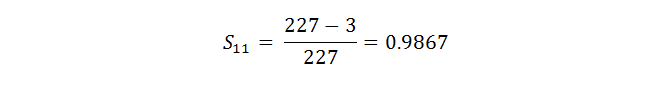

In [ ]:
#calculating survival probability by hand:
event_at_11=kmf.event_table.iloc[2,:]

#calculating the survival probability for t=11:
surv_for_11=(event_at_11.at_risk-event_at_11.observed)/event_at_11.at_risk
surv_for_11

Now what we found here is the probability for a certain period of time only. What we want is the probability for the entire time period for a patient, i.e., the probability of the patient surviving all the rounds of experiment.

This seems confusing, right?

Let’s take a very simple example to understand the concept of conditional probability.

Let’ say we have a total of 15 balls in a non-transparent box. Out of the 15 balls, we have 7 black balls, 5 red balls, and 3 green balls. Here’s a pictorial view for that.

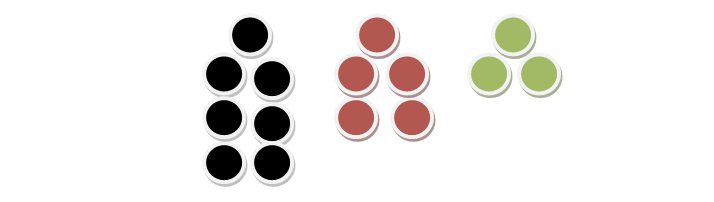

Now let's find some probabilities!

**Probability for choosing a red ball:**

Notice that we have a total of 5 red balls out of 15 balls.

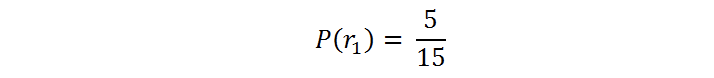

**Probability of choosing 2nd red ball:**

Since we've removed a ball that was red, the total number of red balls we have is 4, and the total number of balls we have is 14.

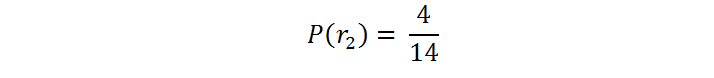

Now what my point here is: What if we want to find the probability of both the balls selected to be red. This is our case here. Like we want to find the probability that we know that a patient has survived the 1st time interval, and we want to find the probability of them surviving the 2nd time interval given that they have survived the 1st time interval. My point here is we just don’t want to find the probability of the 2nd time interval only. We want the total probability of them surviving the time period.

In the case of the balls, we want to find out what’s the probability that both of the selected balls are red?

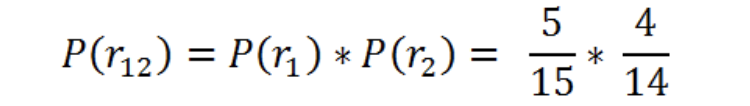

Here our goal is to find the probability for the entire timeline of that person. Like they survived the 1st, 2nd, and 3rd timelines, than our survival probability will be:

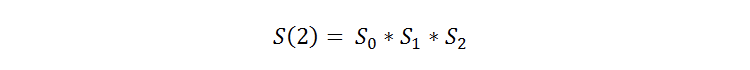

Getting back to our main example:

<a id="21"></a> <br>
### Survival After Probability:

We want to find the probability that a patient has survived through all the timeline till now. Now we need to find the actual survival probability for a patient.

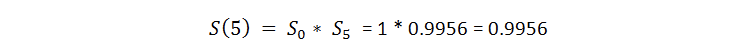

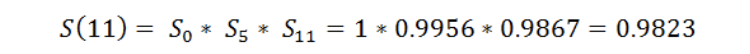

In [ ]:
surv_after_5=surv_for_0*surv_for_5
surv_after_11=surv_for_0*surv_for_5*surv_for_11

print(surv_after_5)
print(surv_after_11)

<a id="22"></a> <br>
### Predict Function:

Now the kmf object’s predict function does all of this work for us. But it’s always good to know the logic behind it.

In [ ]:
#our kmf object has done all these calculations for us:
kmf.predict(11)

<a id="23"></a> <br>
### Finding Survival Probability for an Array of Time:

We can find the probability for an array of time:

In [ ]:
#For an array:
kmf.predict([0,5,11,12])

<a id="24"></a> <br>
### Get survival probability for the whole timeline:

The kmf object’s survival_function_ gives us the complete data for our timeline.

In [ ]:
#To get full list:
kmf.survival_function_

* The survival probability for a patient at timeline 0 is 1. If you think it over, then you can understand that the probability that a person dies on the 1st day of diagnosis is nearly equal to 0. So we can say that the survival probability is as high as possible. As the timeline increases, the probability of survival decreases for a patient.

<a id="25"></a> <br>
### Median:

It provides the number of days where on average, 50% of patients survived.

In [ ]:
#It provides the number of days where on average 50% of patients died.
kmf.median_survival_time_

From the above code, we can say that, on average, a person lives 310 days after the day of diagnosis.

<a id="26"></a> <br>
### Plot the graph:

Here we can plot the graph for survival probability.

In [ ]:
#Plot the graph:
kmf.plot()

plt.title("The Kaplan-Meier Estimate")
plt.ylabel("Probability of Patient Still Alive")
plt.xlabel("Timeline")
plt.show()

<a id="27"></a> <br>
### Confidence interval:

The confidence interval gives us the range of values we are fairly sure our true values lie in. Here you can see in the above graph the light blue color shade represents the confidence interval of survival. From that, we can say that the probability at that timeline certainly lies between that confidence interval only.

In [ ]:
kmf.confidence_interval_

Now all the information we have is for the survival of a person. Now we are going to see what is the probability for a person to die at a certain timeline. Here notice that a higher survival probability is good for a person, but higher cumulative density (probability of a person to die) is not so good!

<a id="28"></a> <br>
### Probability of a person to die:

In [ ]:
kmf.event_table

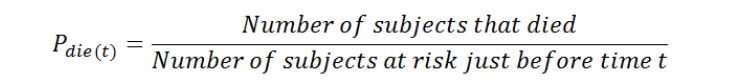

Here notice that the denominator value is the subjects at risk just before time (t). In a simple way, we can say that the person at_risk of the previous row.

The formula for cumulative density:

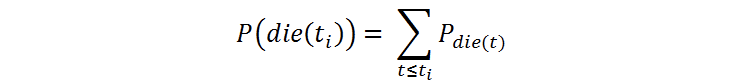

Calculate the probability by hand:

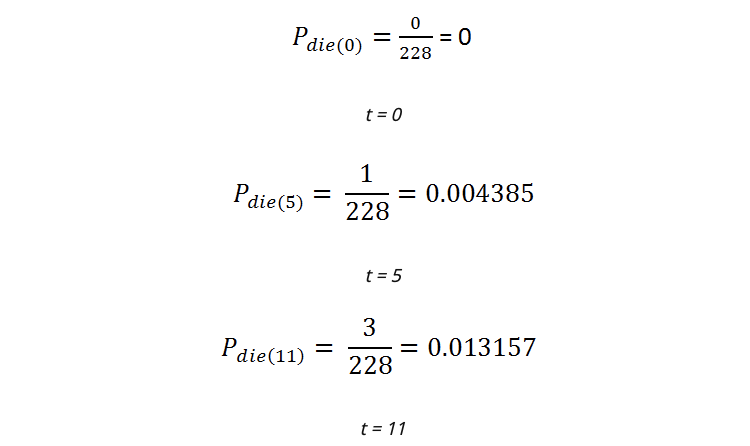

Find the cumulative density:

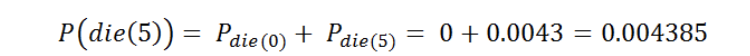

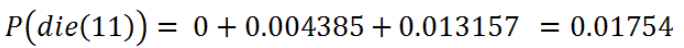

In [ ]:
#Probability of die:
#p(n)=p(0)+...+p(n)

kmf.cumulative_density_

<a id="29"></a> <br>
### Plot the graph:

In [ ]:
kmf.plot_cumulative_density()
plt.show()

<a id="30"></a> <br>
# Example 2: Estimating Hazards Rates Using Nelson-Aalen

<a id="31"></a> <br>
### Hazard Function

The survival functions are a great way to summarize and visualize the survival dataset. However, it is not the only way. If we are curious about the hazard function h(t) of a population, we, unfortunately, can’t transform the Kaplan Meier estimate. For that, we use the Nelson-Aalen hazard function:

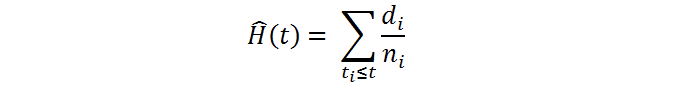

Where,
di=number of deaths at time ti
ni=number of patients at the start.

<a id="32"></a> <br>
### Import Library - Fitting the Data:

In [ ]:
#Hazard Function
from lifelines import NelsonAalenFitter

naf=NelsonAalenFitter()
naf.fit(data["time"], event_observed=data["dead"])

<a id="33"></a> <br>
### Cumulative Hazard:

Keep in mind we take at_risk of the current row:

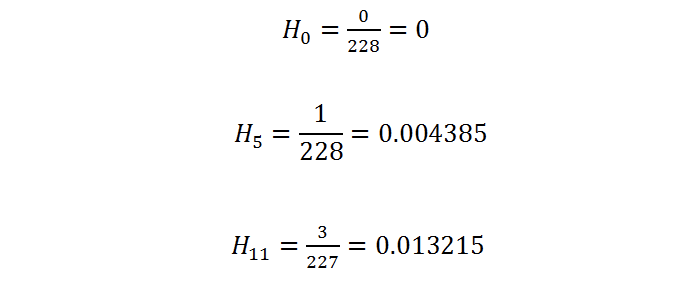

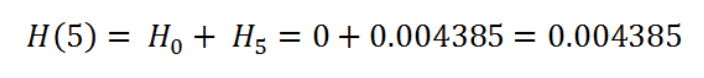

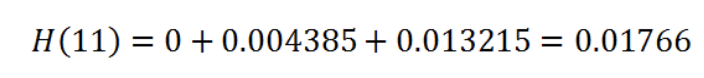

In [ ]:
naf.cumulative_hazard_

<a id="34"></a> <br>
### Plot the Data:

In [ ]:
#Plot the cumulative_hazard:
naf.plot_cumulative_hazard()
plt.show()

The cumulative hazard has less obvious understanding than the survival functions, but the hazard functions are the basis of more advanced techniques in survival analysis.

<a id="35"></a> <br>
### Predict a Value:

In [ ]:
#We can predict the value of a certain point:
naf.predict(1022)